<a href="https://colab.research.google.com/github/SaraParvizi/Pathrise-Job-Placement-Prediction-/blob/main/Falcon_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded=files.upload()

Saving dataset_falcon9.csv to dataset_falcon9.csv


In [3]:
import pandas as pd


In [4]:
df=pd.read_csv('dataset_falcon9.csv')

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt


In [7]:
import numpy as np


In [8]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,6/4/2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,9/3/2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5,2,B1060,-80.603956,28.608058,1
86,87,10/6/2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5,2,B1058,-80.603956,28.608058,1
87,88,10/18/2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5,5,B1051,-80.603956,28.608058,1
88,89,10/24/2020,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5,2,B1060,-80.577366,28.561857,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     int64  
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [10]:
df['BoosterVersion']

,BoosterVersion
0,Falcon 9
1,Falcon 9
2,Falcon 9
3,Falcon 9
4,Falcon 9
...,...
85,Falcon 9
86,Falcon 9
87,Falcon 9
88,Falcon 9


In [11]:
df['PayloadMass'].describe()

,PayloadMass
count,90.000000
mean,6104.959412
std,4694.671720
min,350.000000
25%,2510.750000
50%,4701.500000
75%,8912.750000
max,15600.000000


<Axes: >

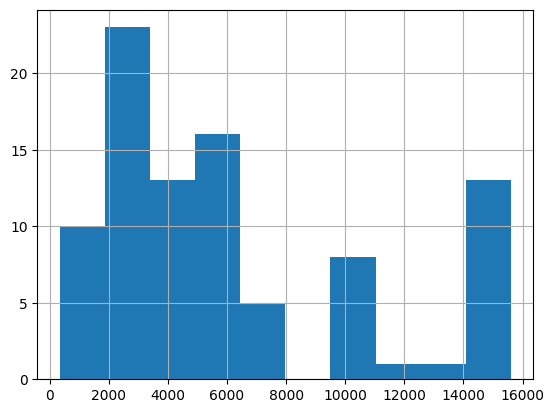

In [12]:
df['PayloadMass'].hist()

<Axes: >

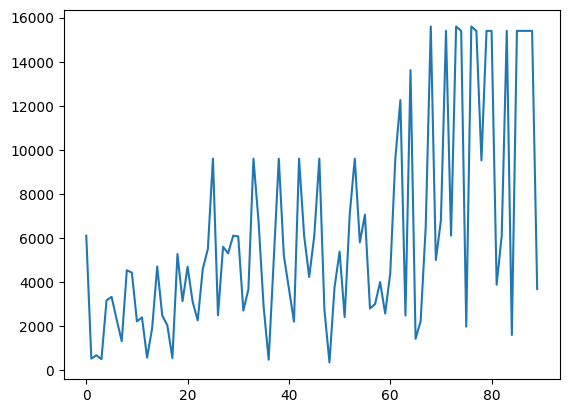

In [13]:
df['PayloadMass'].plot()

In [14]:
df['Orbit']

,Orbit
0,LEO
1,LEO
2,ISS
3,PO
4,GTO
...,...
85,VLEO
86,VLEO
87,VLEO
88,VLEO


In [15]:
set(df['Orbit'])##madarhai k dore zaminan

{'ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO'}

<Axes: >

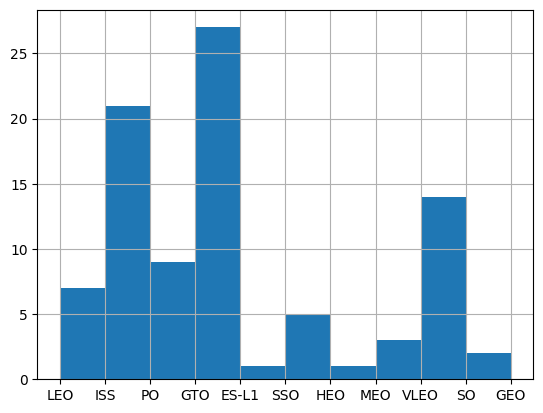

In [16]:
df['Orbit'].hist()

In [17]:
#devided df into two parts
df_successful = df[df['Class'] == 1]

In [18]:
df_fail = df[df['Class'] !=1]

In [19]:
df_successful.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 6 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    60 non-null     int64  
 1   Date            60 non-null     object 
 2   BoosterVersion  60 non-null     object 
 3   PayloadMass     60 non-null     float64
 4   Orbit           60 non-null     object 
 5   LaunchSite      60 non-null     object 
 6   Outcome         60 non-null     object 
 7   Flights         60 non-null     int64  
 8   GridFins        60 non-null     bool   
 9   Reused          60 non-null     bool   
 10  Legs            60 non-null     bool   
 11  LandingPad      55 non-null     object 
 12  Block           60 non-null     int64  
 13  ReusedCount     60 non-null     int64  
 14  Serial          60 non-null     object 
 15  Longitude       60 non-null     float64
 16  Latitude        60 non-null     float64
 17  Class           60 non-null     int64  
dt

In [20]:
df_successful['Orbit'].value_counts() #tedad partab hai k baraye harkodom az orbitha bode che ghadre

,count
Orbit,
GTO,14
ISS,13
VLEO,12
PO,6
LEO,5
SSO,5
MEO,2
ES-L1,1
HEO,1


In [21]:
df_fail['Orbit'].value_counts()

,count
Orbit,
GTO,13
ISS,8
PO,3
LEO,2
VLEO,2
MEO,1
SO,1


In [22]:
df_successful['LaunchSite'].value_counts()# dar in siteha ma chandta partab dashtim

,count
LaunchSite,
CCAFS SLC 40,33
KSC LC 39A,17
VAFB SLC 4E,10


In [23]:
df_successful['Outcome'].value_counts()#true ha onai hastan k ba movafaghiat landing kardan

,count
Outcome,
True ASDS,41
True RTLS,14
True Ocean,5


In [24]:
df_fail['Outcome'].value_counts() #movafaghiat amiz landing nakardan

,count
Outcome,
None None,19
False ASDS,6
False Ocean,2
None ASDS,2
False RTLS,1


In [25]:
df_successful['LandingPad'].value_counts()

,count
LandingPad,
5e9e3032383ecb6bb234e7ca,30
5e9e3032383ecb267a34e7c7,12
5e9e3033383ecbb9e534e7cc,11
5e9e3032383ecb554034e7c9,2


In [26]:
df_successful['Reused'].value_counts()# chand bar az in ha estefade shode

,count
Reused,
False,31
True,29


In [27]:
df['Reused'].value_counts()# az 53 tash estefade nashode dobar

,count
Reused,
False,53
True,37


In [28]:
df['Longitude'].value_counts()# tool joghrafia  ehtiaji b in column nist bayad drop beshe

,count
Longitude,
-80.577366,55
-80.603956,22
-120.610829,13


In [29]:
df['Latitude'].value_counts()#arz joghrafiai ehtiaji b in column nist bayad drop beshe

,count
Latitude,
28.561857,55
28.608058,22
34.632093,13


In [30]:
df['LaunchSite'].value_counts()

,count
LaunchSite,
CCAFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     int64  
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [32]:
df=df.drop(['BoosterVersion','Serial','Longitude','Latitude'],axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   Date          90 non-null     object 
 2   PayloadMass   90 non-null     float64
 3   Orbit         90 non-null     object 
 4   LaunchSite    90 non-null     object 
 5   Outcome       90 non-null     object 
 6   Flights       90 non-null     int64  
 7   GridFins      90 non-null     bool   
 8   Reused        90 non-null     bool   
 9   Legs          90 non-null     bool   
 10  LandingPad    64 non-null     object 
 11  Block         90 non-null     int64  
 12  ReusedCount   90 non-null     int64  
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(1), int64(5), object(5)
memory usage: 8.1+ KB


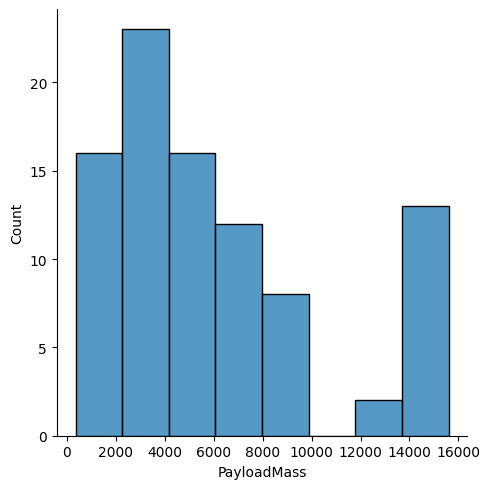

In [34]:
sns.displot(df['PayloadMass']) #histogram( payload mass is numerical col)

<Axes: xlabel='LaunchSite', ylabel='count'>

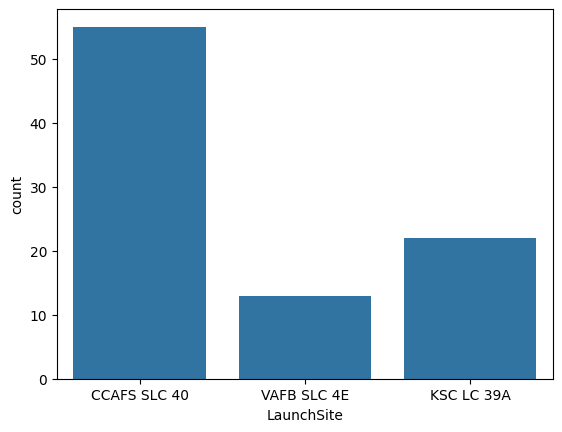

In [35]:
sns.countplot(x='LaunchSite',data=df) #categorical hastan

In [36]:
df_missing=pd.read_csv('dataset_falcon9.csv')

In [37]:
df_missing

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,6/4/2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,9/3/2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5,2,B1060,-80.603956,28.608058,1
86,87,10/6/2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5,2,B1058,-80.603956,28.608058,1
87,88,10/18/2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5,5,B1051,-80.603956,28.608058,1
88,89,10/24/2020,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5,2,B1060,-80.577366,28.561857,1


In [38]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     int64  
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [39]:
from IPython.core import payload
#data preparation and consider and replace null values missing values how to deal with missing data?
playload_mean=df_missing['PayloadMass'].mean()

In [40]:
playload_mean #avg in col ra peida kardim ta nullha ra ba in avg por konim

np.float64(6104.959411777779)

In [41]:
df_missing['PayloadMass']

,PayloadMass
0,6104.959412
1,525.000000
2,677.000000
3,500.000000
4,3170.000000
...,...
85,15400.000000
86,15400.000000
87,15400.000000
88,15400.000000


In [42]:
df_missing['PayloadMass']=df_missing['PayloadMass'].replace(np.nan,playload_mean)#az nampy khastim khanehaye khali ra dorost konad va ba mean por konad

In [43]:
df_missing.info()#data nemerical bashad az in ravesh estefade mikonim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     int64  
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [44]:
df_missing['LaunchSite'].value_counts() #for data that is categorical ba bishtarin meghdari l por shode dar an col missing value ha ra por mikonim

,count
LaunchSite,
CCAFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [45]:
df_missing['LaunchSite']=df_missing['LaunchSite'].replace(np.nan, 'CCAFS SLC 40')

In [46]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     int64  
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [47]:
print(df.columns.tolist())

['FlightNumber', 'Date', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Class']


# New Section

In [48]:
df = df.drop(['FlightNumber', 'Date'], axis=1)

In [49]:
print(df.columns.tolist())

['PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Class']


In [50]:
# remove leading/trailing spaces and fix None values
df['Outcome'] = df['Outcome'].astype(str).str.strip()
df['LandingPad'] = df['LandingPad'].astype(str).str.strip()
df['Orbit'] = df['Orbit'].astype(str).str.strip()
df['LaunchSite'] = df['LaunchSite'].astype(str).str.strip()

In [51]:
df = df.drop(columns=['Serial'], errors='ignore')

In [52]:
df = pd.get_dummies(
    df,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Outcome'],
    drop_first=True
)

In [53]:
# 2. Convert all boolean columns to 0/1
bool_cols = df.select_dtypes(include='bool').columns
for col in bool_cols:
    df[col] = df[col].astype(int)



In [54]:
df


,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_GEO,Orbit_GTO,...,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,LandingPad_nan,Outcome_False Ocean,Outcome_False RTLS,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS
0,6104.959412,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,525.000000,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,677.000000,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,500.000000,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,1,1,1,5,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
86,15400.000000,3,1,1,1,5,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
87,15400.000000,6,1,1,1,5,5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
88,15400.000000,3,1,1,1,5,2,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [55]:
#df_dummy = pd.get_dummies(
   # df[['Orbit', 'LaunchSite', 'LandingPad','LandingPad']],
    #drop_first=True)
#tabdil object to numeric


In [56]:
#boolian to numeric
df['GridFins']=df['GridFins'].astype(int)

In [57]:
df['GridFins']

,GridFins
0,0
1,0
2,0
3,0
4,0
...,...
85,1
86,1
87,1
88,1


In [58]:
df['Reused']=df['Reused'].astype(int)#boolean to numeric

In [59]:
df['Legs']=df['Legs'].astype(int)#boolean to numeric

In [60]:
#2 ta df k sakhte boodim alan b ham join mikonim
#df=pd.concat([df,df_dummy],axis=1)

In [61]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_GEO,Orbit_GTO,...,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,LandingPad_nan,Outcome_False Ocean,Outcome_False RTLS,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS
0,6104.959412,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,525.000000,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,677.000000,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,500.000000,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,1,1,1,5,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
86,15400.000000,3,1,1,1,5,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
87,15400.000000,6,1,1,1,5,5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
88,15400.000000,3,1,1,1,5,2,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [62]:
df.dtypes.value_counts()

,count
int64,31
float64,1


In [63]:
df = df.loc[:, ~df.columns.duplicated()]#no duplicate

In [64]:
df.to_csv('preprocess falcon.csv', index=False)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PayloadMass                          90 non-null     float64
 1   Flights                              90 non-null     int64  
 2   GridFins                             90 non-null     int64  
 3   Reused                               90 non-null     int64  
 4   Legs                                 90 non-null     int64  
 5   Block                                90 non-null     int64  
 6   ReusedCount                          90 non-null     int64  
 7   Class                                90 non-null     int64  
 8   Orbit_GEO                            90 non-null     int64  
 9   Orbit_GTO                            90 non-null     int64  
 10  Orbit_HEO                            90 non-null     int64  
 11  Orbit_ISS                         

In [66]:
df.isnull().sum()

,0
PayloadMass,0
Flights,0
GridFins,0
Reused,0
Legs,0
Block,0
ReusedCount,0
Class,0
Orbit_GEO,0
Orbit_GTO,0


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df.drop('Class', axis=1)
y = df['Class']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logmodel = LogisticRegression()#train the model
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
LogisticRegression()

LogisticRegression()

In [73]:
predictions=logmodel.predict(X_test)

In [74]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [75]:
y_test

,Class
50,0
6,1
51,0
54,1
53,1
69,1
32,1
31,1
21,1
88,1


In [76]:
#evaluation
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix(y_test,predictions)

array([[ 6,  1],
       [ 1, 10]])

In [78]:
from sklearn.metrics import accuracy_score #accuracy score

In [79]:
accuracy_score(y_test,predictions,normalize=False)

16.0

In [80]:
accuracy_score(y_test,predictions,normalize=True)

0.8888888888888888

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.91      0.91      0.91        11

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



In [83]:
#train the model KNN
from sklearn.neighbors import KNeighborsClassifier

In [84]:
Knn=KNeighborsClassifier(n_neighbors=10)

In [85]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [86]:
predictions1=Knn.predict(X_test)

In [87]:
predictions1

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [88]:
y_test

,Class
50,0
6,1
51,0
54,1
53,1
69,1
32,1
31,1
21,1
88,1


In [89]:
#Evaluation
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test,predictions1)

array([[2, 5],
       [3, 8]])

In [91]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions1, normalize=False)

10.0

In [92]:
from sklearn.metrics import accuracy_score #correct answer 55%

accuracy_score(y_test, predictions1, normalize=True)

0.5555555555555556

print(classification_report(y_test,predictions1))

In [93]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.62      0.73      0.67        11

    accuracy                           0.56        18
   macro avg       0.51      0.51      0.50        18
weighted avg       0.53      0.56      0.54        18



In [94]:
from sklearn.tree import DecisionTreeClassifier#desition tree

In [95]:
tree=DecisionTreeClassifier()

In [96]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [98]:
predictions2=tree.predict(X_test)

In [99]:
confusion_matrix(y_test,predictions2)

array([[ 6,  1],
       [ 1, 10]])

In [100]:
accuracy_score(y_test,predictions2)

0.8888888888888888

In [101]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.91      0.91      0.91        11

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



In [102]:
#Rain forest prediction model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
rfc_pred=rfc.predict(X_test)

In [104]:
print(confusion_matrix(y_test,rfc_pred))

[[ 6  1]
 [ 1 10]]


In [105]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.91      0.91      0.91        11

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



In [106]:
from sklearn.svm import SVC #support vextor machine classification algoriyhm

In [108]:
svm=SVC()

In [109]:
svm.fit(X_train,y_train)

SVC()

In [110]:
SVC

sklearn.svm._classes.SVC

In [112]:
predictions3=svm.predict(X_test)

In [113]:
predictions3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [114]:
y_train

,Class
2,0
13,0
56,1
76,0
73,1
...,...
75,1
63,1
70,1
81,1


In [115]:
confusion_matrix(y_test,predictions3)

array([[ 0,  7],
       [ 0, 11]])

In [116]:
accuracy_score(y_test,predictions3)

0.6111111111111112

In [117]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      1.00      0.76        11

    accuracy                           0.61        18
   macro avg       0.31      0.50      0.38        18
weighted avg       0.37      0.61      0.46        18



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
### 🔍 Final Model Conclusion

In this project, multiple machine learning classification models were developed and evaluated to predict whether a rocket launch would successfully reach space. The models included Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Support Vector Machine (SVM).

After comparing model performance using accuracy, precision, recall, and F1-score, the **Random Forest Classifier** was selected as the final model.

### Why Random Forest?
- Achieved the **highest accuracy** among all tested models
- Demonstrated strong and balanced performance across evaluation metrics
- Effectively captured **non-linear relationships** between features
- Less sensitive to feature scaling and outliers compared to distance-based models
- Suitable for real-world prediction tasks with mixed feature types

### Key Insights
The analysis shows that variables such as **launch site, orbit type, payload mass, and booster reuse** have a significant impact on launch success. Understanding these factors can support better decision-making in launch planning and risk assessment.

### Conclusion
The Random Forest model provides a reliable and robust solution for predicting rocket launch success. This project demonstrates a complete end-to-end machine learning workflow, including data preprocessing, exploratory data analysis, feature engineering, model development, and evaluation.

### Future Improvements
- Apply hyperparameter tuning to further improve model performance
- Use cross-validation for more robust evaluation
- Analyze feature importance to enhance model interpretability